In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import RocCurveDisplay

**Importing the dataset**

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Divyashanmugapriyan/Dataset/main/Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.shape

(400, 5)

**Splitting the dataset into the Training set and Test set**

In [5]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [11]:
X=data.drop(columns=['Purchased','User ID'])
Y=data['Purchased']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

**Feature Scaling**

In [14]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [35]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

**Predicting the Test set results**

In [39]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

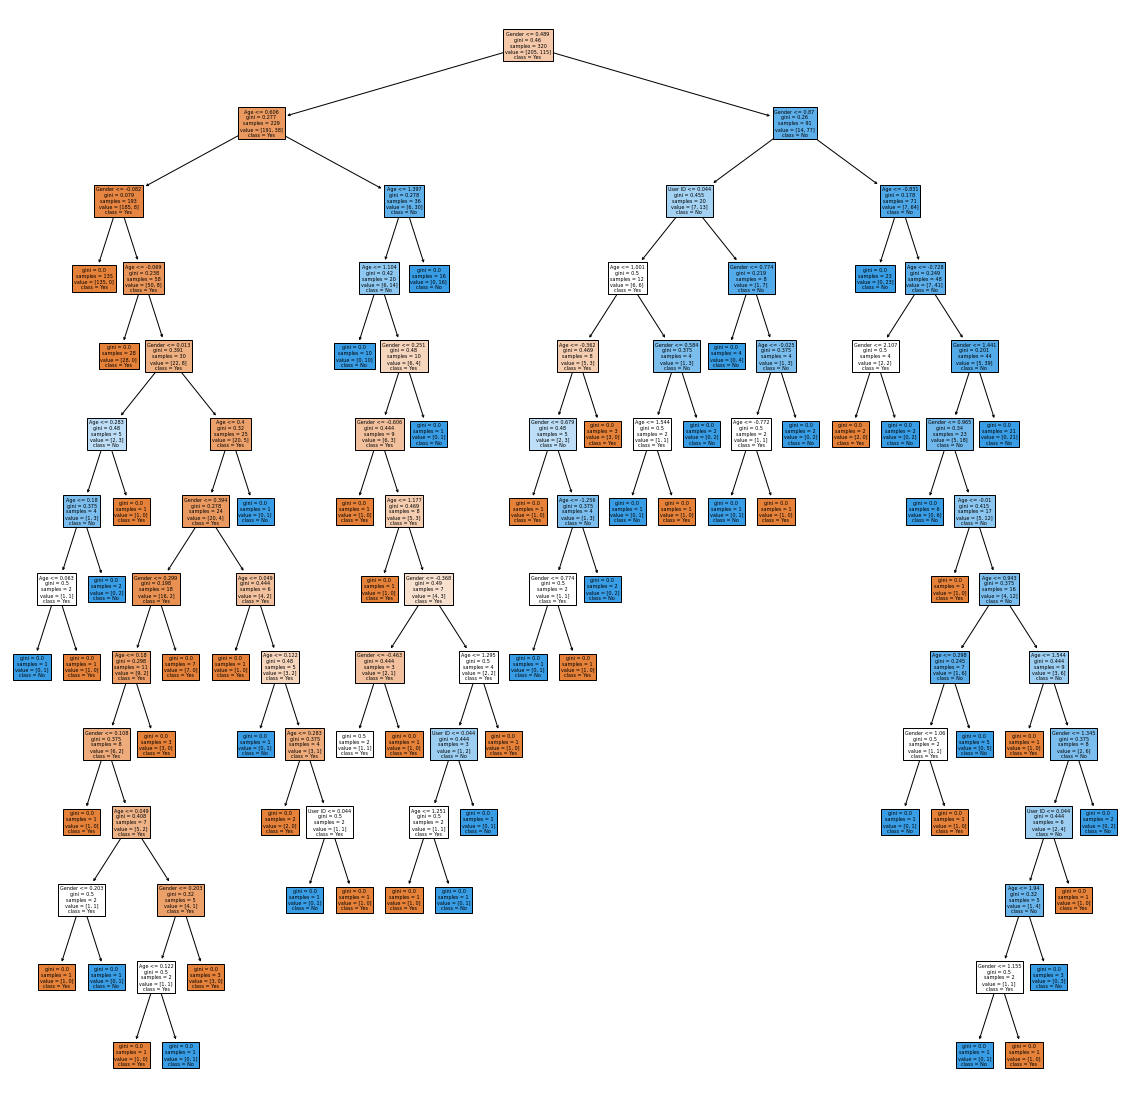

In [40]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['Yes','No']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

**Making the Confusion Matrix**

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [27]:
y_pred = model.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,46,6,52
1,1,27,28
All,47,33,80


**Visualising the Training set results**

In [28]:
training_score = model.score(x_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 99.6875


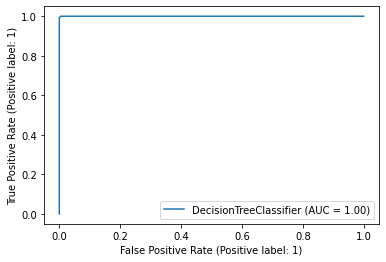

In [29]:
RocCurveDisplay.from_estimator(model,x_train,y_train)

**Visualising the Test set results**

In [30]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 91.25


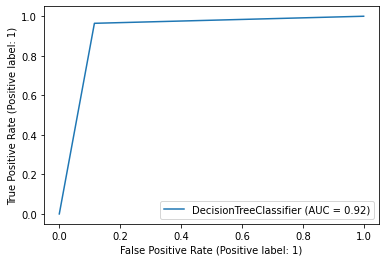

In [31]:
RocCurveDisplay.from_estimator(model,x_test,y_test)